In [2]:
import pandas as pd

df = pd.read_csv('student_depression_dataset.csv')

DATA OVERVIEW

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

DATA CLEANING

In [4]:
df.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.nunique()

id                                       27901
Gender                                       2
Age                                         34
City                                        52
Profession                                  14
Academic Pressure                            6
Work Pressure                                3
CGPA                                       332
Study Satisfaction                           6
Job Satisfaction                             5
Sleep Duration                               5
Dietary Habits                               4
Degree                                      28
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             6
Family History of Mental Illness             2
Depression                                   2
dtype: int64

In [8]:
new_df = df.drop(columns='id')

In [20]:
new_df.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [23]:
print(new_df['Work Pressure'].unique())

[0. 5. 2.]


In [ ]:
pip install seaborns

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement seaborns (from versions: none)
ERROR: No matching distribution found for seaborns


# EDA

### Univariate Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

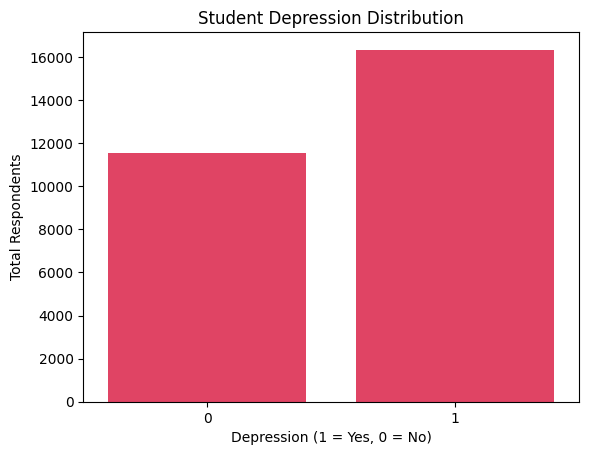

In [ ]:
# Student Depression Distribution

sns.countplot(x='Depression',data=new_df, color='#FA2A55')
plt.title('Student Depression Distribution')
plt.xlabel('Depression (1 = Yes, 0 = No)')
plt.ylabel("Total Respondents")
plt.show()

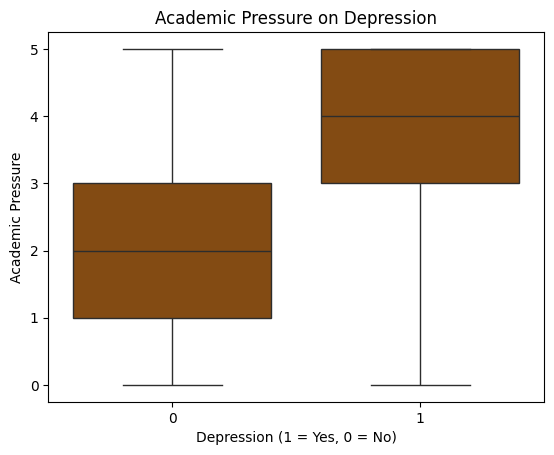

In [ ]:
#Academic Pressure vs Student Depression

sns.boxplot(x='Depression', y='Academic Pressure', data=new_df, color='#FA2A55')
plt.title('Academic Pressure on Depression')
plt.xlabel('Depression (1 = Yes, 0 = No)')
plt.ylabel("Academic Pressure")
plt.show()


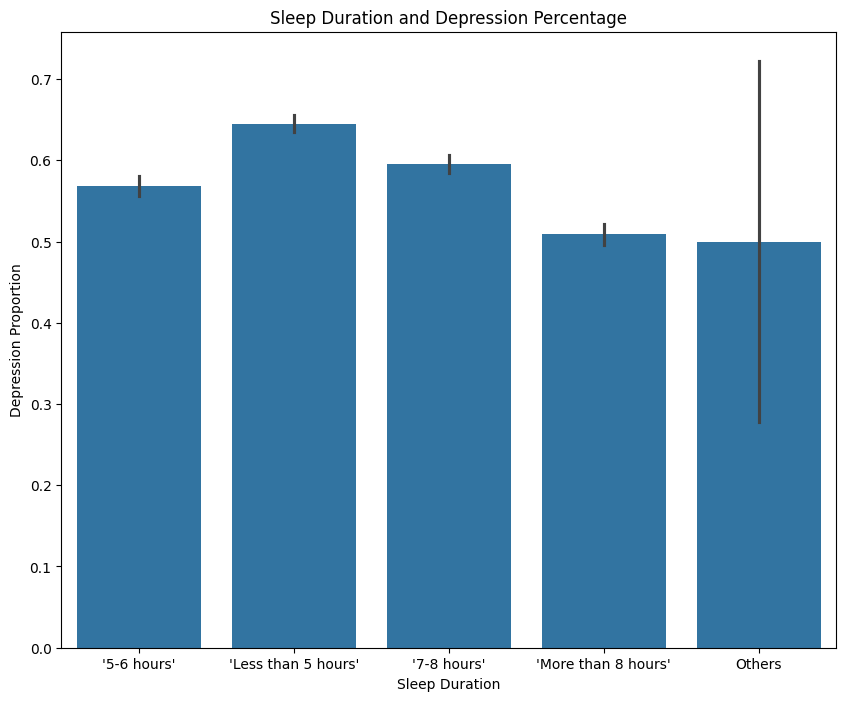

In [ ]:
#Sleep

plt.figure(figsize=(10,8))
sns.barplot(x='Sleep Duration', y='Depression', data=new_df, estimator=lambda x: sum(x)/len(x))
plt.title('Sleep Duration and Depression Percentage')
plt.xlabel('Sleep Duration')
plt.ylabel('Depression Proportion')
plt.show()

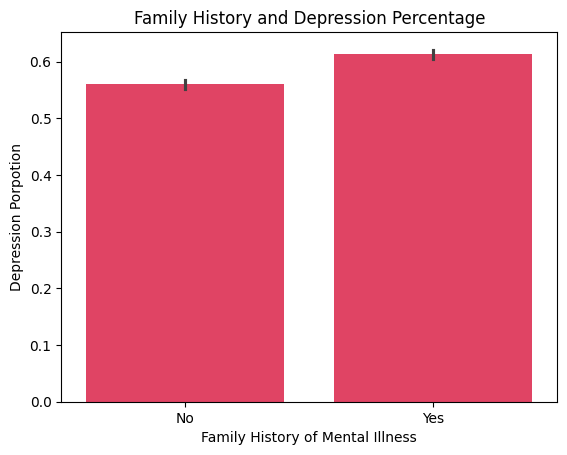

In [35]:
sns.barplot(color='#FA2A55',x='Family History of Mental Illness', y='Depression', data=new_df, estimator=lambda x: sum(x)/len(x))
plt.title('Family History and Depression Percentage')
plt.xlabel('Family History of Mental Illness')
plt.ylabel('Depression Porpotion')
plt.show()

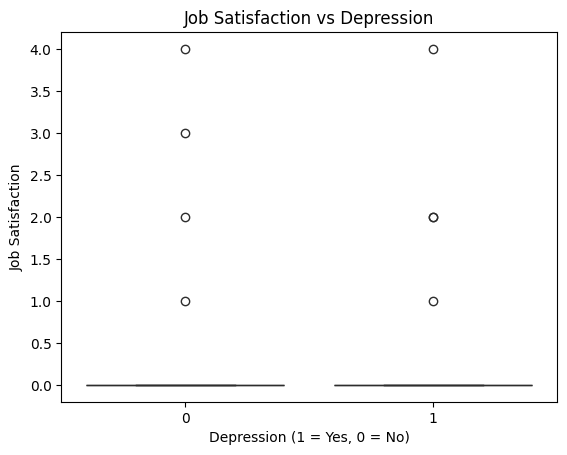

In [36]:
sns.boxplot(x='Depression', y='Job Satisfaction', data=new_df, color='#964B00')
plt.title('Job Satisfaction vs Depression')
plt.xlabel('Depression (1 = Yes, 0 = No)')
plt.ylabel('Job Satisfaction')
plt.show()


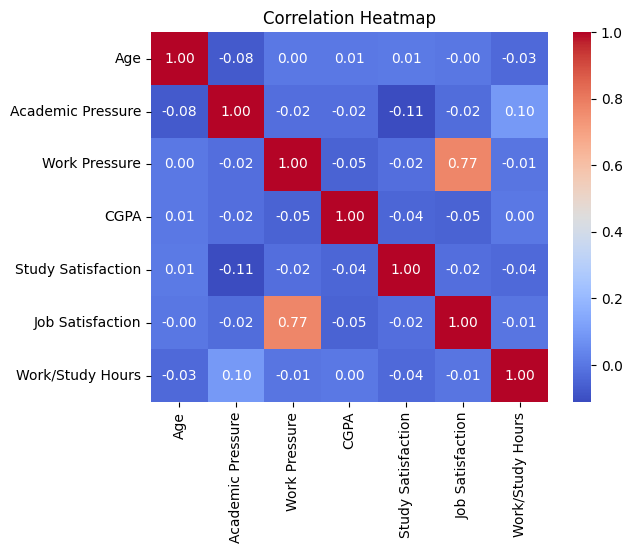

In [37]:
numeric_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction',
                'Job Satisfaction', 'Work/Study Hours']
sns.heatmap(new_df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

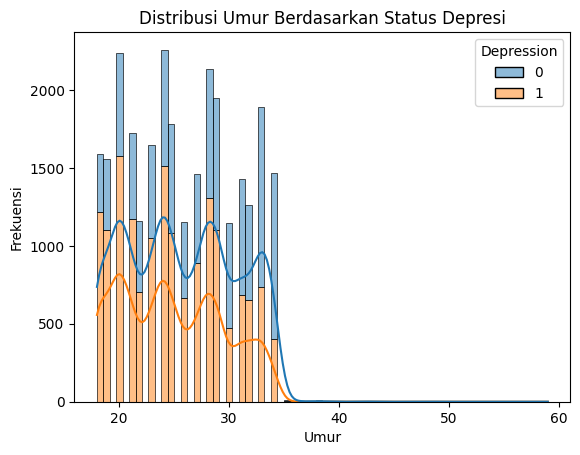

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(data=new_df, x='Age', hue='Depression', multiple='stack', kde=True)
plt.title("Distribusi Umur Berdasarkan Status Depresi")
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

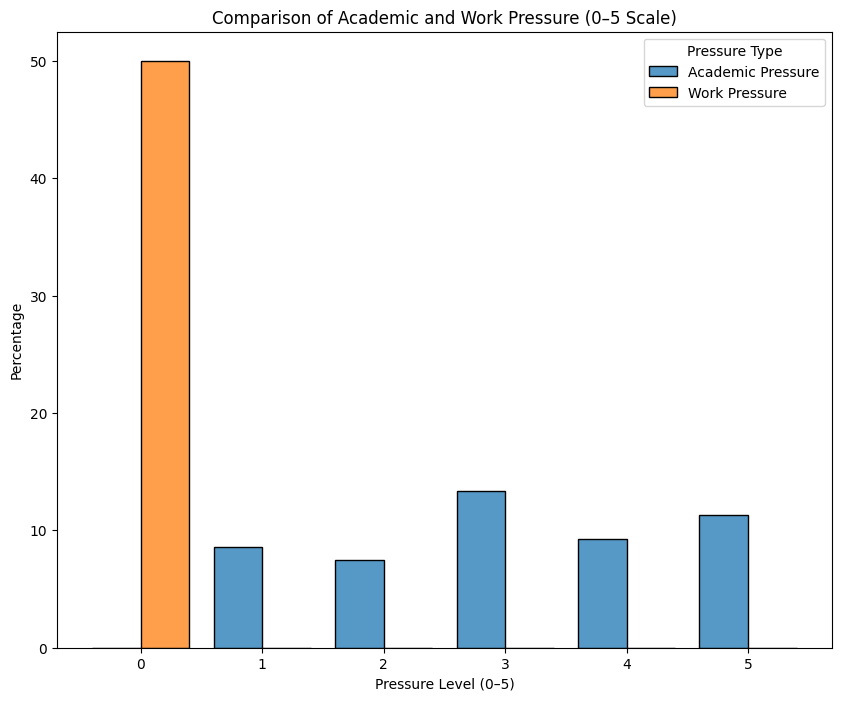

In [25]:
data_melted = new_df.melt(
    value_vars = ['Academic Pressure', 'Work Pressure'],
    var_name='Pressure Type',
    value_name='Range'
)

plt.figure(figsize=(10,8))
sns.histplot(
    data=data_melted,
    x='Range',
    hue='Pressure Type',
    multiple='dodge',
    bins=6,             # karena ada 0–5
    shrink=0.8,
    stat='percent',
    discrete=True     # tampilkan persentase
)
plt.title("Comparison of Academic and Work Pressure (0–5 Scale)")
plt.xlabel("Pressure Level (0–5)")
plt.ylabel("Percentage")
plt.show()


# ? ML kali ya